In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import glob
import re


In [2]:
# beige_color = (255/255,253/255,250/255)
beige_color = '#FFFDFA'

# sns.set_theme(style="ticks", rc={'figure.facecolor': beige_color, 'axes.facecolor' : beige_color})
sns.set_theme(style="ticks")
# sns.set_context("talk")
# sns.set_context("poster")


In [3]:
path = "results/linear_multi"
# path = "results/linear_multi/N500"
# path = "results/nonlinear_multi"
# path = "results/nonlinear_multi/trunc_parab"
all_file = glob.glob(path + "/*.csv")
print(all_file)

['results/linear_multi\\linear_dgp_svi_diff_1.csv', 'results/linear_multi\\linear_dgp_svi_diff_10.csv', 'results/linear_multi\\linear_dgp_svi_diff_11.csv', 'results/linear_multi\\linear_dgp_svi_diff_12.csv', 'results/linear_multi\\linear_dgp_svi_diff_13.csv', 'results/linear_multi\\linear_dgp_svi_diff_14.csv', 'results/linear_multi\\linear_dgp_svi_diff_15.csv', 'results/linear_multi\\linear_dgp_svi_diff_16.csv', 'results/linear_multi\\linear_dgp_svi_diff_17.csv', 'results/linear_multi\\linear_dgp_svi_diff_18.csv', 'results/linear_multi\\linear_dgp_svi_diff_19.csv', 'results/linear_multi\\linear_dgp_svi_diff_2.csv', 'results/linear_multi\\linear_dgp_svi_diff_20.csv', 'results/linear_multi\\linear_dgp_svi_diff_21.csv', 'results/linear_multi\\linear_dgp_svi_diff_22.csv', 'results/linear_multi\\linear_dgp_svi_diff_23.csv', 'results/linear_multi\\linear_dgp_svi_diff_24.csv', 'results/linear_multi\\linear_dgp_svi_diff_25.csv', 'results/linear_multi\\linear_dgp_svi_diff_26.csv', 'results/line

In [4]:
extracted_numbers = [re.findall(r'\d+', s) for s in all_file]
first_numbers = [int(numbers[0]) if numbers else None for numbers in extracted_numbers]
first_numbers.sort()
first_numbers

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55]

In [5]:
lin_dfs = [pd.read_csv(f) for f in all_file]
combined_df = pd.concat(lin_dfs)
combined_df[['model', 'type']] = combined_df['method'].str.split('_', expand=True)
print(combined_df)

       idx   mean  median   true   bias    std   RMSE  RMSE_all    MAE  \
0      1.0  0.847   0.847  0.839  0.008  0.026  0.056     0.071  0.040   
1      1.0  0.822   0.821  0.839 -0.017  0.031  0.126     0.190  0.062   
2      1.0  2.713   2.713  2.690  0.023  0.082  0.052     0.105  0.037   
3      1.0  2.588   2.586  2.690 -0.102  0.096  0.319     0.408  0.109   
4      1.0  0.615   0.614  0.839 -0.224  0.048  0.415     0.421  0.309   
..     ...    ...     ...    ...    ...    ...    ...       ...    ...   
155  504.0  1.828   1.827  2.530 -0.702  0.127  0.844     0.948  0.709   
156  504.0  0.548   0.547  0.516  0.032  0.026  0.181     0.185  0.142   
157  504.0  0.519   0.520  0.516  0.003  0.031  0.227     0.255  0.159   
158  504.0  2.521   2.519  2.530 -0.009  0.117  0.382     0.401  0.299   
159  504.0  2.390   2.391  2.530 -0.140  0.145  0.538     0.593  0.346   

     MAE_all   q025   q975  covering  mean_ind_cover           method  \
0      0.043  0.796  0.898       1.0  

In [6]:
combined_df[['bias','median','true','mean','std','RMSE','RMSE_all','MAE', 'MAE_all', 'q025','q975','covering','mean_ind_cover']] = combined_df[['bias','median','true','mean','std','RMSE','RMSE_all','MAE', 'MAE_all', 'q025','q975','covering', 'mean_ind_cover']].apply(pd.to_numeric, errors='coerce')

In [7]:
# combined_df = combined_df.apply(pd.to_numeric, errors='coerce')


combined_df['type'] = combined_df['type'].replace('observed',"Obs.")
combined_df['type'] = combined_df['type'].replace('oracle',"Oracle")
combined_df['type'] = combined_df['type'].replace('plugin',"Plugin")
combined_df['abs_bias'] = np.abs(combined_df['bias'])
combined_df['ci_length'] = combined_df['q975'] - combined_df['q025']
combined_df['MAPE_manual'] = np.abs((combined_df['mean']-combined_df['true'])/combined_df['true'])

# combined_df.to_csv("results/linear_dgp_N300.csv")


In [8]:
combined_df[combined_df["estimand"]=="dynamic"]

,idx,mean,median,true,bias,std,RMSE,RMSE_all,MAE,MAE_all,...,q975,covering,mean_ind_cover,method,estimand,model,type,abs_bias,ci_length,MAPE_manual
0,1.0,0.847,0.847,0.839,0.008,0.026,0.056,0.071,0.040,0.043,...,0.898,1.0,1.000,Linear_oracle,dynamic,Linear,Oracle,0.008,0.102,0.009535
1,1.0,0.822,0.821,0.839,-0.017,0.031,0.126,0.190,0.062,0.092,...,0.883,1.0,1.000,GP_oracle,dynamic,GP,Oracle,0.017,0.123,0.020262
4,1.0,0.615,0.614,0.839,-0.224,0.048,0.415,0.421,0.309,0.314,...,0.710,0.0,0.222,Linear_observed,dynamic,Linear,Obs.,0.224,0.188,0.266985
5,1.0,0.466,0.466,0.839,-0.373,0.079,0.517,0.545,0.395,0.420,...,0.621,0.0,0.482,GP_observed,dynamic,GP,Obs.,0.373,0.310,0.444577
8,1.0,0.706,0.704,0.839,-0.133,0.047,0.326,0.390,0.245,0.300,...,0.802,0.0,0.866,Linear_3S,dynamic,Linear,3S,0.133,0.184,0.158522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,504.0,0.237,0.238,0.516,-0.279,0.046,0.376,0.396,0.290,0.304,...,0.326,0.0,0.422,GP_observed,dynamic,GP,Obs.,0.279,0.179,0.540698
152,504.0,0.423,0.422,0.516,-0.093,0.030,0.214,0.246,0.155,0.182,...,0.485,0.0,0.866,Linear_3S,dynamic,Linear,3S,0.093,0.118,0.180233
154,504.0,0.405,0.404,0.516,-0.111,0.035,0.243,0.331,0.167,0.221,...,0.475,0.0,0.942,GP_3S,dynamic,GP,3S,0.111,0.137,0.215116
156,504.0,0.548,0.547,0.516,0.032,0.026,0.181,0.185,0.142,0.145,...,0.599,1.0,0.218,Linear_1S,dynamic,Linear,1S,0.032,0.103,0.062016


In [9]:
# print dtype of each column 
print(combined_df.dtypes)

idx               float64
mean              float64
median            float64
true              float64
bias              float64
std               float64
RMSE              float64
RMSE_all          float64
MAE               float64
MAE_all           float64
q025              float64
q975              float64
covering          float64
mean_ind_cover    float64
method             object
estimand           object
model              object
type               object
abs_bias          float64
ci_length         float64
MAPE_manual       float64
dtype: object


In [12]:
err_mask = (combined_df['type'].values == '3S') & (combined_df['MAE'].values > 1)
err_idx = combined_df[err_mask]['idx'].unique()
combined_df = combined_df[~combined_df['idx'].isin(err_idx)]

In [13]:
def coverage_perc(x):
    return np.mean(x)*100

# df_summary = combined_df.groupby(["estimand", "model", "type"]).agg(
df_summary = combined_df.groupby(["estimand", "model", "type"]).agg(
                                        {'mean' : ['mean'],
                                         'median' : ['mean'],
                                         'std' : ['mean'],
                                         'bias' : ['mean'],
                                         'true' : ['mean'],
                                         'RMSE' : ['mean'],
                                         'RMSE_all' : ['mean'],
                                         'MAE' : ['mean'],
                                         'MAE_all' : ['mean'],
                                         # 'MAPE' : ['mean'],
                                         'MAPE_manual' : ['mean', 'std'],
                                         'q025' : ['mean'],
                                         'q975' : ['mean'],
                                         'ci_length' : ['mean'],
                                         'covering' : [coverage_perc],
                                         'mean_ind_cover' : ['mean']}).reset_index()
                                         # 'true_included99' : [coverage_perc]})
                                         # 'true_included95' : ['mean'],
                                         # 'true_included99' : ['mean']})

df_summary


estimand   model    type      mean    median       std      bias      true  \
                                 mean      mean      mean      mean      mean   
0   dynamic      GP      1S  0.746081  0.746458  0.040526  0.005609  0.740472   
1   dynamic      GP      3S  0.575209  0.574855  0.044126 -0.165263  0.740472   
2   dynamic      GP    Obs.  0.407780  0.407716  0.068557 -0.332692  0.740472   
3   dynamic      GP  Oracle  0.719735  0.719986  0.023824 -0.020737  0.740472   
4   dynamic  Linear      1S  0.768495  0.768132  0.030768  0.028023  0.740472   
5   dynamic  Linear      3S  0.605103  0.603979  0.038340 -0.135369  0.740472   
6   dynamic  Linear    Obs.  0.535936  0.535493  0.041936 -0.204536  0.740472   
7   dynamic  Linear  Oracle  0.739716  0.739663  0.020691 -0.000756  0.740472   
8     stoch      GP      1S  2.657106  2.657447  0.147118  0.014002  2.643105   
9     stoch      GP      3S  2.005424  2.005484  0.127986 -0.637681  2.643105   
10    stoch      GP    Obs.  1.884967  1.884435  0.147340 -0.758137  2.643105   
11    stoch      GP  Oracle  2.564261  2.564756  0.080017 -0.078843  2.643105   
12    stoch  Linear      1S  2.746397  2.745089  0.110060  0.103292  2.643105   
13    stoch  Linear      3S  2.160814  2.159435  0.119091 -0.482290  2.643105   
14    stoch  Linear    Obs.  1.785768  1.784108  0.126834 -0.857337  2.643105   
15    stoch  Linear  Oracle  2.640304  2.640052  0.073702 -0.002801  2.643105   

        RMSE  RMSE_all       MAE   MAE_all MAPE_manual                q025  \
        mean      mean      mean      mean        mean       std      mean   
0   0.344135  0.383093  0.243176  0.259849    0.058495  0.045828  0.665168   
1   0.348667  0.452236  0.243536  0.309803    0.220933  0.052419  0.489251   
2   0.502174  0.529551  0.392000  0.413642    0.444903  0.103545  0.273810   
3   0.165344  0.206215  0.066892  0.088677    0.033872  0.024863  0.672089   
4   0.254667  0.258992  0.202965  0.205948    0.058488  0.046135  0.708045   
5   0.296720  0.338284  0.221381  0.256555    0.180579  0.051302  0.533137   
6   0.377868  0.382861  0.282948  0.287323    0.272032  0.083525  0.453596   
7   0.032493  0.051397  0.020188  0.029170    0.021023  0.015926  0.699095   
8   0.644315  0.707135  0.433074  0.466741    0.047801  0.036772  2.367532   
9   0.824534  0.957809  0.658642  0.740673    0.241261  0.034980  1.754300   
10  1.227965  1.279973  0.979118  1.006627    0.286615  0.066724  1.597298   
11  0.358592  0.409702  0.150280  0.185934    0.033954  0.023313  2.405393   
12  0.428818  0.444853  0.342395  0.354180    0.051361  0.037582  2.530180   
13  0.669282  0.734474  0.536427  0.586029    0.182444  0.037286  1.931379   
14  1.112687  1.121122  0.900756  0.906985    0.324233  0.056513  1.536354   
15  0.062673  0.107215  0.056954  0.082776    0.020988  0.016068  2.495488   

        q975 ci_length      covering mean_ind_cover  
        mean      mean coverage_perc           mean  
0   0.824540  0.159371     85.299807       0.455308  
1   0.663023  0.173772      4.255319       0.907358  
2   0.542315  0.268505      1.547389       0.450685  
3   0.765650  0.093561     87.040619       0.952569  
4   0.829242  0.121197     75.822050       0.200967  
5   0.683675  0.150538      8.510638       0.803807  
6   0.618679  0.165083      5.029014       0.231369  
7   0.780128  0.081033     96.711799       0.964627  
8   2.944468  0.576936     92.843327       0.583633  
9   2.256101  0.501801      0.193424       0.764337  
10  2.174867  0.577569      1.353965       0.306027  
11  2.719459  0.314066     85.299807       0.920248  
12  2.963681  0.433501     81.237911       0.375524  
13  2.399571  0.468191      1.353965       0.603853  
14  2.036076  0.499721      0.000000       0.165660  
15  2.784250  0.288762     96.518375       0.964874

Text(0, 0.5, '')

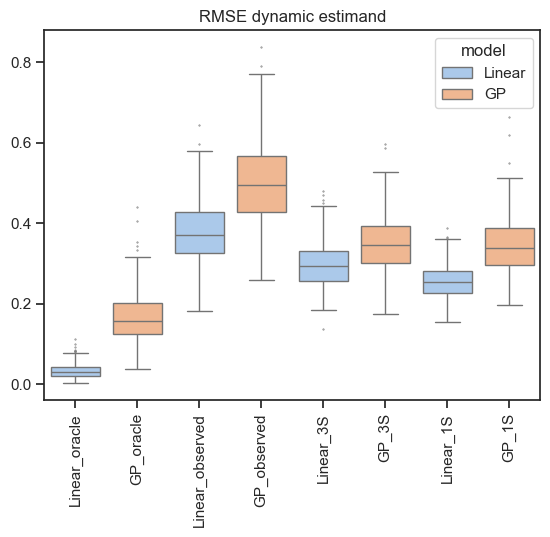

In [14]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=1,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'RMSE',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "model", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("RMSE dynamic estimand")
# plt.ylim(0,.5)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")
# sns.despine()

Text(0, 0.5, '')

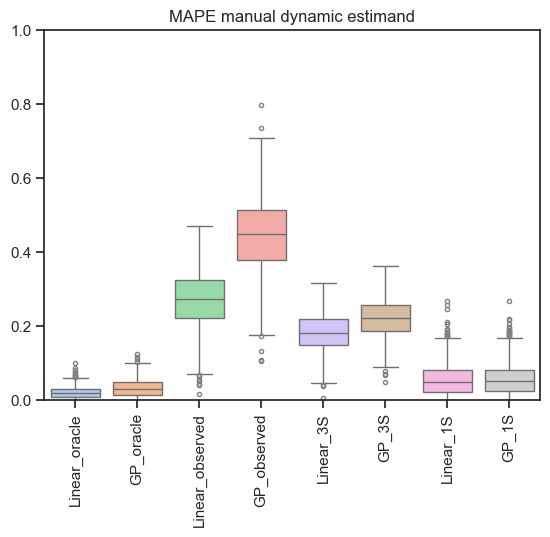

In [15]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'MAPE_manual',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("MAPE manual dynamic estimand")
plt.ylim(0,1)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")

Text(0, 0.5, '')

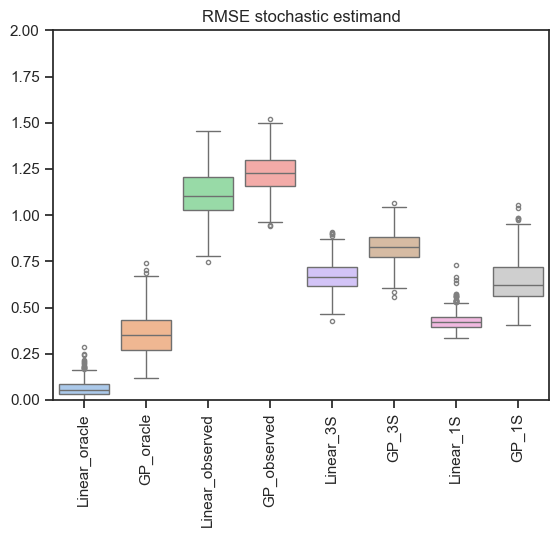

In [16]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="stoch"], x = 'method', y = 'RMSE',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("RMSE stochastic estimand")
plt.ylim(0,2)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")

Text(0, 0.5, '')

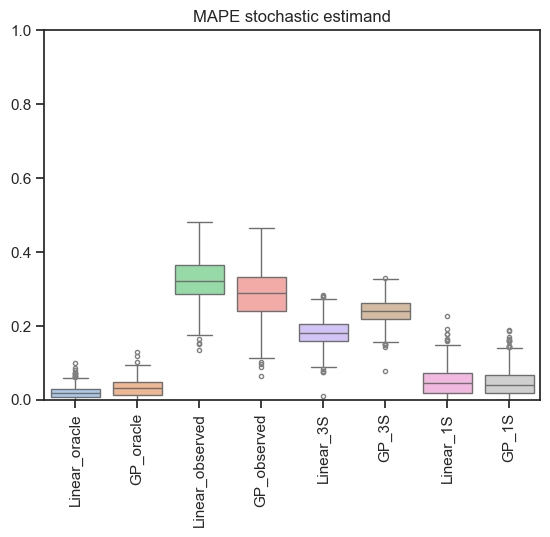

In [17]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="stoch"], x = 'method', y = 'MAPE_manual',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("MAPE stochastic estimand")
plt.ylim(0,1)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")

Text(0, 0.5, '')

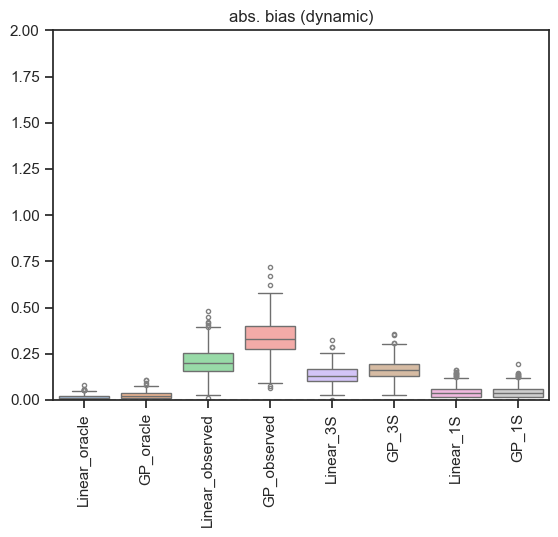

In [20]:
box_bias = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'abs_bias',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_bias.set_title("abs. bias (dynamic)")
plt.ylim(0,2)
plt.xticks(rotation=90)
box_bias.set_xlabel("")
box_bias.set_ylabel("")

Text(0, 0.5, '')

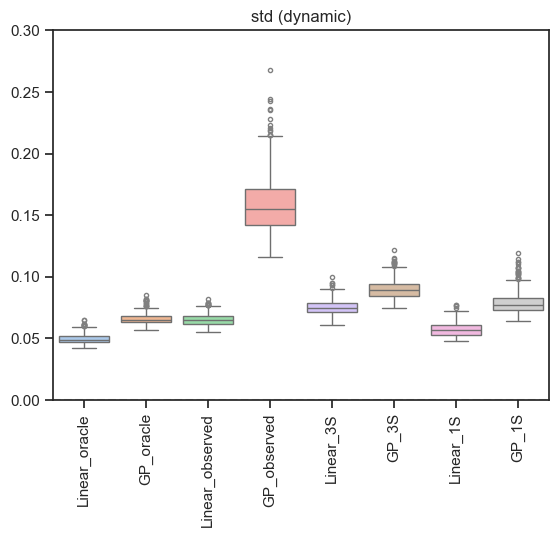

In [42]:
box_std = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'std',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_std.set_title("std (dynamic)")
plt.ylim(0,.3)
plt.xticks(rotation=90)
box_std.set_xlabel("")
box_std.set_ylabel("")

Text(0, 0.5, '')

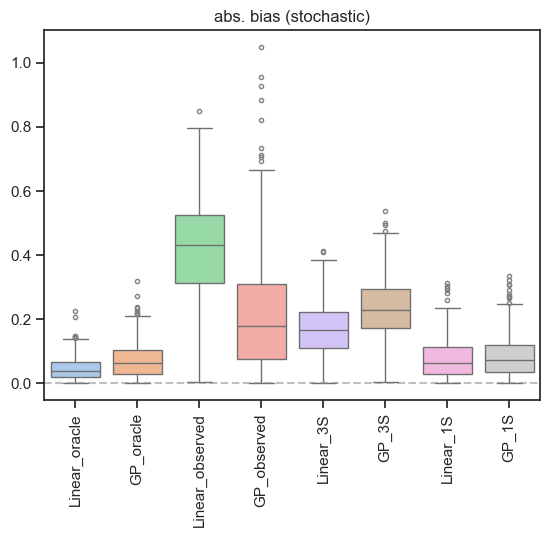

In [43]:
box_bias = sns.boxplot(data=combined_df[combined_df["estimand"]=="stoch"], x = 'method', y = 'abs_bias',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_bias.set_title("abs. bias (stochastic)")
# plt.ylim(0,.25)
plt.xticks(rotation=90)
box_bias.set_xlabel("")
box_bias.set_ylabel("")

Text(0, 0.5, '')

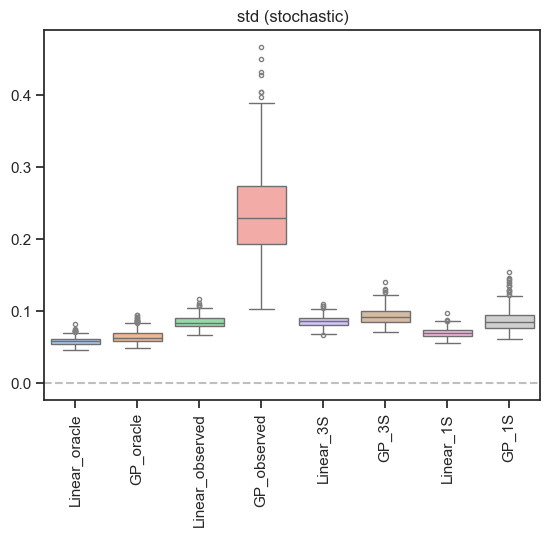

In [44]:
box_std = sns.boxplot(data=combined_df[combined_df["estimand"]=="stoch"], x = 'method', y = 'std',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_std.set_title("std (stochastic)")
# plt.ylim(0,.1)
plt.xticks(rotation=90)
box_std.set_xlabel("")
box_std.set_ylabel("")

In [45]:
def format_percentage(value, x=1):
    return f"{value*x:.1f}%"

df_summary_dynamic = df_summary[df_summary["estimand"]=="dynamic"]
# df_summary_dynamic = df_summary[df_summary["estimand"]=="stoch"]
df_summary_dynamic.columns = df_summary_dynamic.columns.droplevel(1)
df_summary_dynamic["coverage"] = df_summary_dynamic["covering"].apply(format_percentage)
df_summary_dynamic["mean_ind_cover"] = df_summary_dynamic["mean_ind_cover"].apply(format_percentage, x=100)
print(df_summary_dynamic)

combined_df_dynamic = combined_df[combined_df["estimand"]=="dynamic"]
# combined_df_dynamic = combined_df[combined_df["estimand"]=="stoch"]
# print(combined_df_dynamic)

  estimand   model    type      mean    median       std      bias      TRUE  \
0  dynamic      GP      1S  2.686303  2.686614  0.078935 -0.007258  2.729679   
1  dynamic      GP      3S  2.556009  2.555488  0.090106 -0.137553  2.729679   
2  dynamic      GP    Obs.  1.903802  1.903843  0.158993 -0.789760  2.729679   
3  dynamic      GP  Oracle  2.665387  2.665429  0.066088 -0.028175  2.729679   
4  dynamic  Linear      1S  2.715503  2.715357  0.057726  0.021942  2.729679   
5  dynamic  Linear      3S  2.600056  2.599382  0.075782 -0.093506  2.729679   
6  dynamic  Linear    Obs.  2.274139  2.274045  0.065130 -0.419422  2.729679   
7  dynamic  Linear  Oracle  2.694056  2.693935  0.050027  0.000494  2.729679   

       RMSE  RMSE_all       MAE   MAE_all       MAPE      q025      q975  \
0  0.672238  0.728494  0.481562  0.516519  21.319234  2.530816  2.840398   
1  0.719519  0.859364  0.527715  0.635025  10.586998  2.381072  2.733973   
2  1.568245  1.608144  1.217872  1.242838  49.79368

C:\Users\bar21\AppData\Local\Temp\ipykernel_13124\2229529795.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summary_dynamic["coverage"] = df_summary_dynamic["covering"].apply(format_percentage)
C:\Users\bar21\AppData\Local\Temp\ipykernel_13124\2229529795.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summary_dynamic["mean_ind_cover"] = df_summary_dynamic["mean_ind_cover"].apply(format_percentage, x=100)


In [46]:
df_summary_dynamic['model_type'] = df_summary_dynamic[['model', 'type']].apply(lambda x: '_'.join(x), axis=1)

print(df_summary_dynamic)


  estimand   model    type      mean    median       std      bias      TRUE  \
0  dynamic      GP      1S  2.686303  2.686614  0.078935 -0.007258  2.729679   
1  dynamic      GP      3S  2.556009  2.555488  0.090106 -0.137553  2.729679   
2  dynamic      GP    Obs.  1.903802  1.903843  0.158993 -0.789760  2.729679   
3  dynamic      GP  Oracle  2.665387  2.665429  0.066088 -0.028175  2.729679   
4  dynamic  Linear      1S  2.715503  2.715357  0.057726  0.021942  2.729679   
5  dynamic  Linear      3S  2.600056  2.599382  0.075782 -0.093506  2.729679   
6  dynamic  Linear    Obs.  2.274139  2.274045  0.065130 -0.419422  2.729679   
7  dynamic  Linear  Oracle  2.694056  2.693935  0.050027  0.000494  2.729679   

       RMSE  RMSE_all       MAE   MAE_all       MAPE      q025      q975  \
0  0.672238  0.728494  0.481562  0.516519  21.319234  2.530816  2.840398   
1  0.719519  0.859364  0.527715  0.635025  10.586998  2.381072  2.733973   
2  1.568245  1.608144  1.217872  1.242838  49.79368

C:\Users\bar21\AppData\Local\Temp\ipykernel_13124\2384414092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summary_dynamic['model_type'] = df_summary_dynamic[['model', 'type']].apply(lambda x: '_'.join(x), axis=1)


In [25]:
df_summary_dynamic["true"]

KeyError: 'true'

C:\Users\bar21\AppData\Local\Temp\ipykernel_23944\2107373927.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summary_dynamic['categ_pos'] = df_summary_dynamic['model_type'].map(categ_pos)


KeyError: 'true'

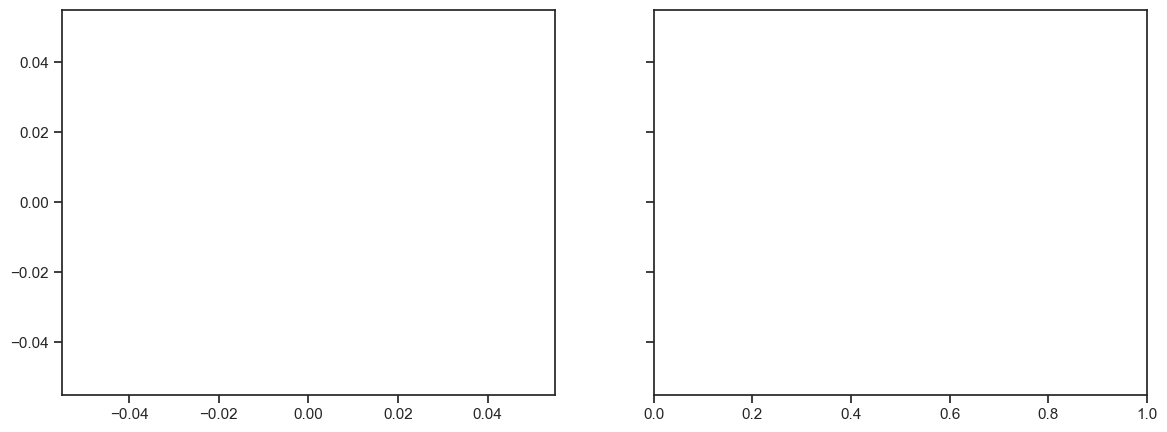

In [26]:
# Plot points with error bars
categories = np.arange(len(df_summary_dynamic['model_type']))
category_labels = df_summary_dynamic['model_type'].unique()

# Create a dictionary to map category positions

# Map categ to positions
model_names = ['True', 'Observed', 'Multi-stage', 'Plug-in']
model_order = ['Linear_Oracle', 'GP_Oracle', 'Linear_Obs.', 'GP_Obs.',
               'Linear_3S', 'GP_3S', 'Linear_1S', 'GP_1S']
categ_pos = {category: pos for pos, category in enumerate(model_order)}
df_summary_dynamic['categ_pos'] = df_summary_dynamic['model_type'].map(categ_pos)
# combined_df_dynamic['categ_pos'] = combined_df_dynamic['model_type'].map(categ_pos)

# Assign colors to categ2
unique_categ2 = df_summary_dynamic['model']
# colors = plt.cm.tab10(np.linspace(0, 1, len(unique_categ2)))
color_map = { "GP" : "tab:orange", "Linear" : "tab:blue"}
# color_map = dict(zip(unique_categ2, colors))

# Plotting
plt.style.use('seaborn-v0_8-colorblind')
# plt.style.use('fast')

fig, axs = plt.subplots(1, 2, figsize=(14, 5),
                        gridspec_kw={'width_ratios': [1, 1]}, sharey=True)
# for ax in axs:
#     ax.set_facecolor('white')
# Plot points with different colors based on categ2
for categ2 in unique_categ2:
    subset = df_summary_dynamic[df_summary_dynamic['type'] == categ2]
    axs[0].scatter(subset['mean'],
                subset['categ_pos'],
                label=f'{categ2}', color=color_map[categ2], s=650)


for i, row in df_summary_dynamic.iterrows():
    axs[0].errorbar(
        row['mean'] - row['true'], 
        row['categ_pos'], 
        xerr=[[row['mean'] - row['q025']],
              [row['q975'] - row['mean']]], 
        fmt='o', 
        # color='black', 
        color = color_map[row['model']], 
        ecolor = color_map[row['model']], 
        # ecolor='black', 
        capsize=5, markersize = 8   
    )
    
    axs[0].annotate(
                    # row['mean_ind_cover'], 
                    row['coverage'], 
                    xy=(row['mean'] - row['true'], row['categ_pos']), 
                    xytext=(0, 13), 
                    textcoords='offset points', 
                    ha='center', 
                    va='top',
                    fontsize=10, 
                    color='black')    

# Customize the x-axis to show category labels
axs[0].set_yticks(np.arange(0.5,len(model_order),2))
# axs[0].set_yticklabels(model_order)
axs[0].set_yticklabels(model_names, fontsize=14, fontweight='bold')
axs[0].set_ylim(-1, len(model_order) - 0.5)
# axs[0].axvline(df_summary_dynamic["true"][0], color='grey', linestyle='--', alpha=0.5)
axs[0].axvline(0, color='black', linestyle='--', alpha=0.3)
axs[0].set_title('Coverage & Mean error (95% CI)', fontsize=16, fontweight='bold')
# axs[0].grid(True)


flierprops = dict(marker='.', markerfacecolor='None', markersize=3,  markeredgecolor='grey')
sns.boxplot(
    data=combined_df_dynamic, 
    # x='MAE', 
    x='RMSE', 
    # x='MAPE', 
    y='method', 
    hue="model", 
    palette=color_map, 
    ax=axs[1],
    flierprops=flierprops
)

axs[1].set_yticks(np.arange(0.5,len(model_order),2))
axs[1].set_ylim(-1, len(model_order) - 0.5)
# axs[1].set_yticklabels([])
axs[1].set_xlabel('')
axs[1].set_ylabel('')
axs[1].set_title('RMSE', fontsize=18, fontweight='bold')
handles, labels = axs[1].get_legend_handles_labels()
ordered_handles = [handles[1], handles[0]]  # Reorder legend
ordered_labels = [labels[1], labels[0]]  # Reorder labels
axs[1].legend(ordered_handles, ordered_labels, title='', loc='upper right', 
              fontsize=13)
# axs[1].grid(True)
plt.tight_layout()
# plt.style.use('seaborn-whitegrid')
axs[0].tick_params(axis='x', labelsize=12)
axs[1].tick_params(axis='x', labelsize=12)


# plt.savefig('results/figs/nonlin_truncated_parab.png', dpi = 1000)           # Save as PNG file
plt.show()
